

# Project: Investigate a Dataset - [Database_No_show_appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

The information below shows the attributes of the dataset and their respective meaning.
     
  <b>PatientId:</b>          Identity that uniquely identifies a patient.<br>
  <b>AppointmentID:</b>      Identity that uniquely identifies an appointment.<br>
  <b>Gender:</b>             Gender of patient either male or female.<br>
  <b>ScheduledDay: </b>      Day the patient set up and book their appointment.<br>
  <b>AppointmentDay:</b>     The actual day the patient is to visit the doctor.<br>
  <b>Age:</b>                How old is the patient<br>
  <b>Neighbourhood:</b>      The location of the hospital where the appointment takes place.<br>
  <b>Scholarship:</b>       This indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.<br>
  <b>Hipertension:</b>       This indicates whether or not the patient is hypertensive<br>
  <b>Diabetes:</b>           This indicates whether or not the patient has diabetes<br>
  <b>Alcoholism: </b>        This indicates whether or not the patient is influenced with alcoholism <br>
  <b>Handcap: </b>           This indicates whether or not the patient is handicaped<br>
  <b>SMS_received: </b>      This indicates whether or not the patient received SMS<br>
  <b>No-show:</b>            This is to indicate if the patient showed up to their appointment or not.

### Question(s) for Analysis


1. Does the waiting period (period from the schedule day and appointment day) affects attendance? Patients may be disouraged or go else where due to the long waiting period.

2. Does the scholarship program affects the attendance of patient? Those with scholarship may not want to loose the scholarship oppurtunity so will find it neccessary to show up.

3. Does the gender of patient affects the attendance of patient? 

4. Does age affect the attendance of patient? Probably the old people doesn't have strength to visit.

5. Does patient's medical problem affects their attendance? Probably some disease can be treated locally so need for showing up.


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use

import pandas as pd
import matplotlib.pyplot as plt

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
# !pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling


In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [4]:
df.shape

(110527, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [8]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

> So far there is no duplicated record neither is there missing value.

> I am going to drop the patientId and AppointmentID as it is not needed to answer my questions for this analysis.

> The ScheduleDay and AppointmentDay need to be converted from string to date 


### Data Cleaning


In [9]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop(['PatientId','AppointmentID'], axis=1, inplace = True)

In [10]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Neighbourhood   110527 non-null  object        
 5   Scholarship     110527 non-null  int64         
 6   Hipertension    110527 non-null  int64         
 7   Diabetes        110527 non-null  int64         
 8   Alcoholism      110527 non-null  int64         
 9   Handcap         110527 non-null  int64         
 10  SMS_received    110527 non-null  int64         
 11  No-show         110527 non-null  object        
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 10.1+ MB


In [13]:
# I renamed the Handcap column to Handicap 
# I renamed the No-show column to No_show for error free access

df.rename(columns={'Handcap':'Handicap', 'No-show':'No_show'}, inplace=True)

In [14]:
pd.DataFrame(
    {
        'Max':df.max(),
        'Min':df.min()
    }
)

,Max,Min
Gender,M,F
ScheduledDay,2016-06-08 00:00:00,2015-11-10 00:00:00
AppointmentDay,2016-06-08 00:00:00,2016-04-29 00:00:00
Age,115,-1
Neighbourhood,VILA RUBIM,AEROPORTO
Scholarship,1,0
Hipertension,1,0
Diabetes,1,0
Alcoholism,1,0
Handicap,4,0


#### Observations
> Since the HandCap values should either be True or False that is, 1 or 0, then any value above 1 is not valid and sould be gotten rid of.

> I observed that we have a negative value for the age column which idealy is impossible and absurd. Those rows with negative age values would be deleted

In [15]:
df[df['Age'] < 0]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
99832,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [16]:
# I am removing the record with the negative number of age, coz negative age is not possible

df.drop(labels=99832, axis=0, inplace=True)

In [17]:
df[df['Age'] < 0]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show


In [18]:
df[df['Handicap'] > 1]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
946,M,2016-04-14,2016-04-29,94,BELA VISTA,0,1,1,0,2,1,No
1665,M,2016-03-30,2016-04-29,64,SANTA MARTHA,0,1,0,1,2,1,No
1666,M,2016-03-30,2016-04-29,64,SANTA MARTHA,0,1,0,1,2,0,No
2071,M,2016-04-29,2016-04-29,64,SANTA MARTHA,0,1,0,1,2,0,No
2091,F,2016-04-29,2016-04-29,11,ANDORINHAS,0,0,0,0,2,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
108376,F,2016-06-01,2016-06-07,44,ROMÃO,0,1,1,0,2,1,No
109484,M,2016-05-31,2016-06-02,64,DA PENHA,0,1,1,0,2,0,No
109733,F,2016-06-03,2016-06-07,34,JUCUTUQUARA,0,0,0,0,2,1,No
109975,M,2016-06-02,2016-06-06,39,PRAIA DO SUÁ,1,0,0,0,2,1,No


In [19]:
df.groupby('Gender').Handicap.value_counts()


Gender  Handicap
F       0           70549
        1            1181
        2             105
        3               3
        4               1
M       0           37736
        1             861
        2              78
        3              10
        4               2
Name: Handicap, dtype: int64

In [20]:
df.drop(df[df['Handicap']>1].index, inplace=True)

In [21]:
g = df.groupby('Gender').No_show.value_counts()
g

Gender  No_show
F       No         57162
        Yes        14568
M       No         30887
        Yes         7710
Name: No_show, dtype: int64

In [22]:
pd.DataFrame(
    {
        'Max':df.max(),
        'Min':df.min()
    }
)

,Max,Min
Gender,M,F
ScheduledDay,2016-06-08 00:00:00,2015-11-10 00:00:00
AppointmentDay,2016-06-08 00:00:00,2016-04-29 00:00:00
Age,115,0
Neighbourhood,VILA RUBIM,AEROPORTO
Scholarship,1,0
Hipertension,1,0
Diabetes,1,0
Alcoholism,1,0
Handicap,1,0


In [23]:
df['waiting_period'] = df['AppointmentDay'] - df['ScheduledDay']

In [24]:
pd.DataFrame(
    {
        'max':df.max(),
        'min':df.min()
    }
)

,max,min
Gender,M,F
ScheduledDay,2016-06-08 00:00:00,2015-11-10 00:00:00
AppointmentDay,2016-06-08 00:00:00,2016-04-29 00:00:00
Age,115,0
Neighbourhood,VILA RUBIM,AEROPORTO
Scholarship,1,0
Hipertension,1,0
Diabetes,1,0
Alcoholism,1,0
Handicap,1,0


In [25]:
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,waiting_period
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0 days


#### Observation
> There are occurence of negative waiting periods which is not practically ideal. So I'll be dropping records with such detail.

>To do this, I need to extract the integer part of the waiting_period and convert to interger datatype using the astype function

In [26]:

df['waiting_period'] = df['waiting_period'].astype(str) # convert first to string to apply the split function
df['waiting_period'] = df['waiting_period'].apply(lambda x: x.split(" ")[0]) #'split the statement and pick the first element which is the integer part
df['waiting_period'] = df['waiting_period'].astype(int) # convert back to integer to apply any mathematical process

# # Now I dropped all records with negative occurence of waiting periods
df.drop(df[df['waiting_period'] < 0].index, inplace=True) 

In [27]:
pd.DataFrame(
    {
        'max':df.max(),
        'min':df.min()
    }
)

,max,min
Gender,M,F
ScheduledDay,2016-06-08 00:00:00,2015-11-10 00:00:00
AppointmentDay,2016-06-08 00:00:00,2016-04-29 00:00:00
Age,115,0
Neighbourhood,VILA RUBIM,AEROPORTO
Scholarship,1,0
Hipertension,1,0
Diabetes,1,0
Alcoholism,1,0
Handicap,1,0


In [28]:
print("GENDER\n", df['Gender'].value_counts())
print("================\n\nSCHOLARHIP\n",df['Scholarship'].value_counts())
print("================\n\nHIPERTENSION\n",df['Hipertension'].value_counts())
print("================\n\nDIABETES\n",df['Diabetes'].value_counts())
print("================\n\nALCHOLISM\n",df['Alcoholism'].value_counts())
print("================\n\nHANDICAP\n",df['Handicap'].value_counts())
print("================\n\nSMS RECEIVED\n",df['SMS_received'].value_counts())
print("================\n\nNO SHOW\n",df['No_show'].value_counts())

GENDER
 F    71727
M    38595
Name: Gender, dtype: int64

SCHOLARHIP
 0    99479
1    10843
Name: Scholarship, dtype: int64

HIPERTENSION
 0    88606
1    21716
Name: Hipertension, dtype: int64

DIABETES
 0    102422
1      7900
Name: Diabetes, dtype: int64

ALCHOLISM
 0    106970
1      3352
Name: Alcoholism, dtype: int64

HANDICAP
 0    108282
1      2040
Name: Handicap, dtype: int64

SMS RECEIVED
 0    74887
1    35435
Name: SMS_received, dtype: int64

NO SHOW
 No     88049
Yes    22273
Name: No_show, dtype: int64


array([[<AxesSubplot:title={'center':'ScheduledDay'}>,
        <AxesSubplot:title={'center':'AppointmentDay'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Scholarship'}>,
        <AxesSubplot:title={'center':'Hipertension'}>,
        <AxesSubplot:title={'center':'Diabetes'}>],
       [<AxesSubplot:title={'center':'Alcoholism'}>,
        <AxesSubplot:title={'center':'Handicap'}>,
        <AxesSubplot:title={'center':'SMS_received'}>],
       [<AxesSubplot:title={'center':'waiting_period'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

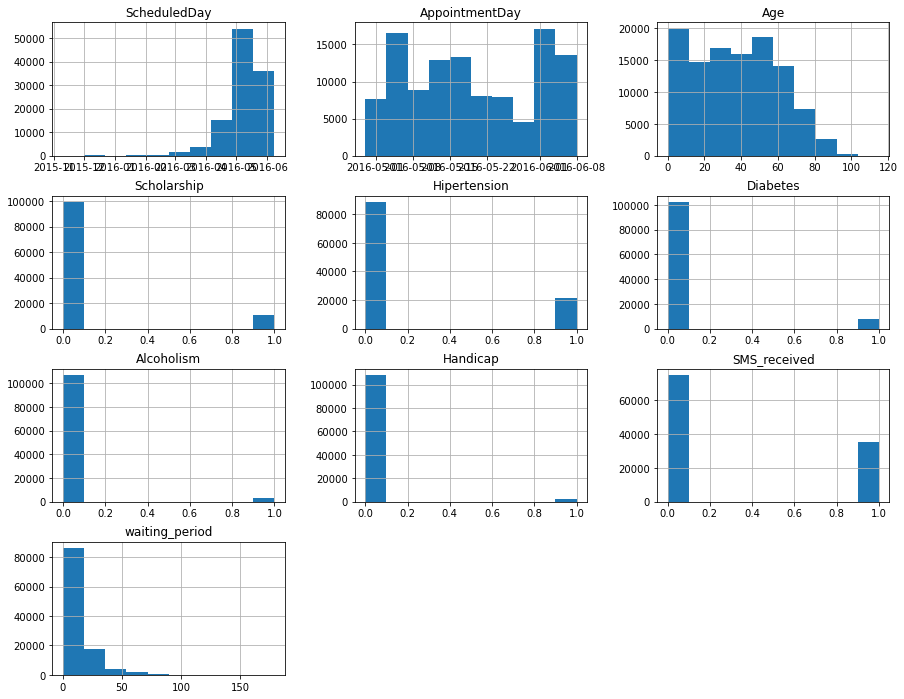

In [29]:
df.hist(figsize=(15,12))

<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1: Does the waiting period (period between the schedule day and appointment day) affects attendance? 

None


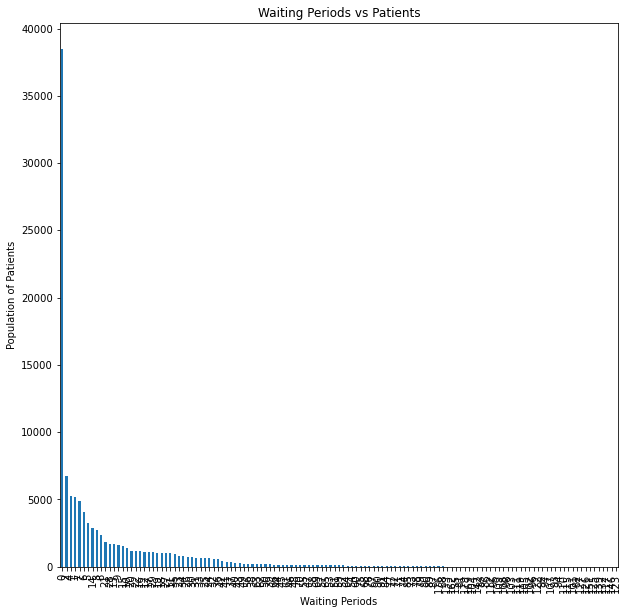

In [30]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

def plotsomething(dataframe, title, x, y, chartkind, grpby=None):
    dataframe = df.waiting_period.value_counts()
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    dataframe.plot(kind=chartkind, figsize=(10,10))
    
np = df.waiting_period.value_counts()
print(plotsomething(dataframe=np, title='Waiting Periods vs Patients', 
                    x='Waiting Periods', y='Population of Patients', chartkind='bar'))

#### Observation
> The visualisation is not clear enough due to the wide range of periods of 129 unique values. So I will put the waiting_periods into groups

In [31]:
df['waiting_period'] = pd.cut(df['waiting_period'], bins=8, labels = ['0-10', '11-20', '21-40', '41-70', '71-90', '91-120', '121-140', '141-179'])
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,waiting_period
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0-10
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0-10
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0-10
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0-10
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0-10


> Now that I have grouped them I will visualize again


In [32]:
n = df.groupby('waiting_period').No_show.value_counts()
n


waiting_period  No_show
0-10            No         76183
                Yes        16461
11-20           No          9092
                Yes         4581
21-40           No          1952
                Yes          884
41-70           No           617
                Yes          277
71-90           No           137
                Yes           41
91-120          No            25
                Yes            6
121-140         Yes           12
                No             9
141-179         No            34
                Yes           11
Name: No_show, dtype: int64

None


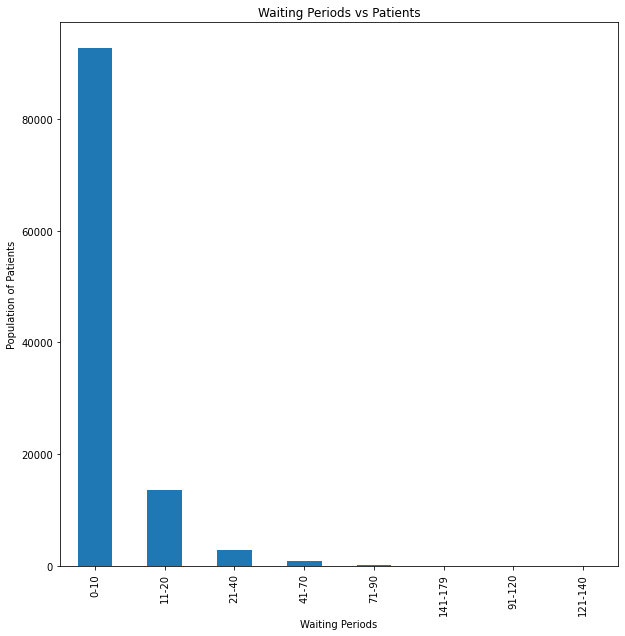

In [33]:
n = df.waiting_period.value_counts()
print(plotsomething(dataframe=n, title='Waiting Periods vs Patients', 
                    x='Waiting Periods', y='Population of Patients', chartkind='bar'))

### Answer 1:
> From the chart above, we can see that most of those who show-up for the appointment have little waiting periods. So I deduce that long waiting periods have a negative impacts on patients attendance to appointment

### Research Question 2 : Does the scholarship program affects the attendance of patient?

<AxesSubplot:title={'center':'Scholarship vs Patients'}, xlabel='No_show,Scholarship', ylabel='Population of Patients'>

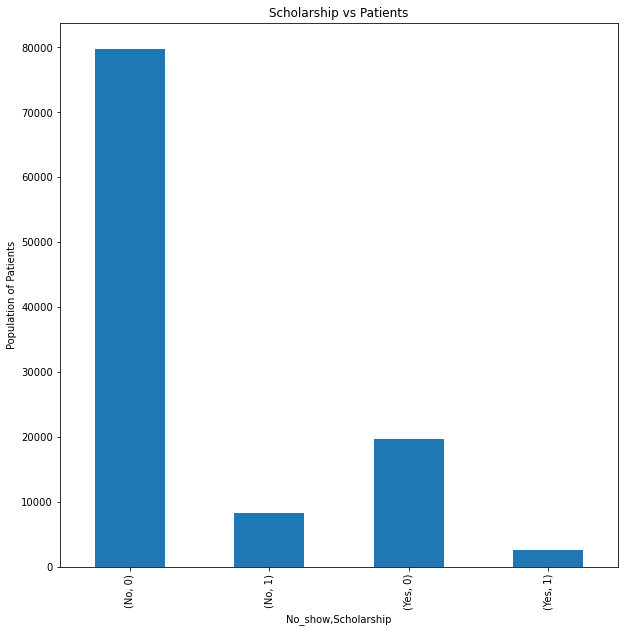

In [34]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
plt.xlabel('Scholarship')
plt.ylabel('Population of Patients')
plt.title("Scholarship vs Patients")
sp=df.groupby('No_show').Scholarship.value_counts()
sp
sp.plot(kind='bar', figsize=(10,10))

### Answer 2
> Scholarship does not have a positive influence on the show up of patient. This is because even those without scholarship showed up for the appointment

### Research Question 3 : Does the gender of patient affects the attendance of patient?

In [35]:
g = df.Gender.value_counts()
gg = df.groupby('Gender').No_show.value_counts()
print(g, "\n=================")
print(gg)


F    71727
M    38595
Name: Gender, dtype: int64 
Gender  No_show
F       No         57162
        Yes        14565
M       No         30887
        Yes         7708
Name: No_show, dtype: int64


### Answer 3
> From the statistics above we cannot tell if gender affects the attendance of patient. We have high percentage of female who registered for appointment to men, so we expect female attendance to be more.

### Research Question 4 : Does age affect the attendance of patient?

<AxesSubplot:title={'center':'Age vs Patients Attendance'}, xlabel='No_show,Age', ylabel='Population of Patients'>

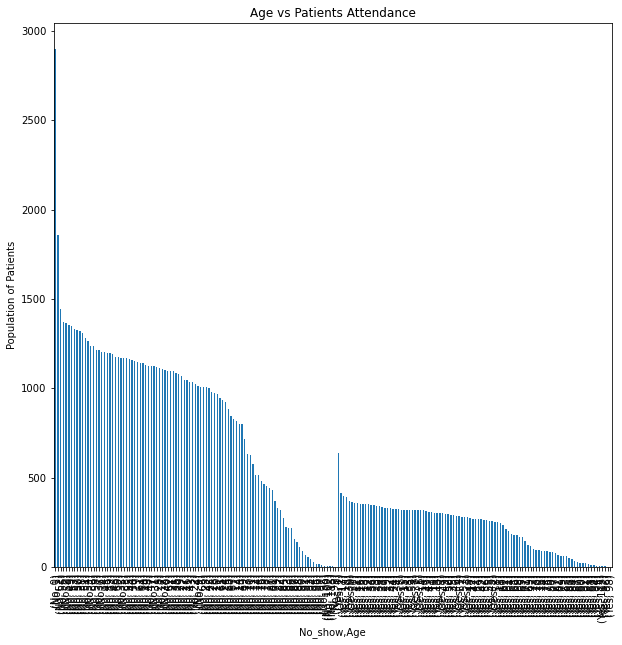

In [36]:
plt.xlabel('Age')
plt.ylabel('Population of Patients')
plt.title("Age vs Patients Attendance")
a=df.groupby('No_show').Age.value_counts()
a.plot(kind='bar', figsize=(10,10))

In [37]:
# I will implement the same grouping I did for the waiting period so as to give a clear visualization
df['Age'] = pd.cut(df['Age'], bins=8, labels = ['0-12', '13-26', '27-40', '41-70', '71-90', '91-120', '121-140', '141-179'])

In [38]:
df['Age'].value_counts()


0-12       23232
27-40      21900
41-70      21587
13-26      19415
71-90      16360
91-120      6945
121-140      876
141-179        7
Name: Age, dtype: int64

In [39]:
df.groupby('Age').No_show.value_counts()

Age      No_show
0-12     No         18312
         Yes         4920
13-26    No         14555
         Yes         4860
27-40    No         17094
         Yes         4806
41-70    No         17641
         Yes         3946
71-90    No         13840
         Yes         2520
91-120   No          5870
         Yes         1075
121-140  No           733
         Yes          143
141-179  No             4
         Yes            3
Name: No_show, dtype: int64

<AxesSubplot:title={'center':'Age vs Patients Attendance'}, xlabel='No_show,None', ylabel='Population of Patients'>

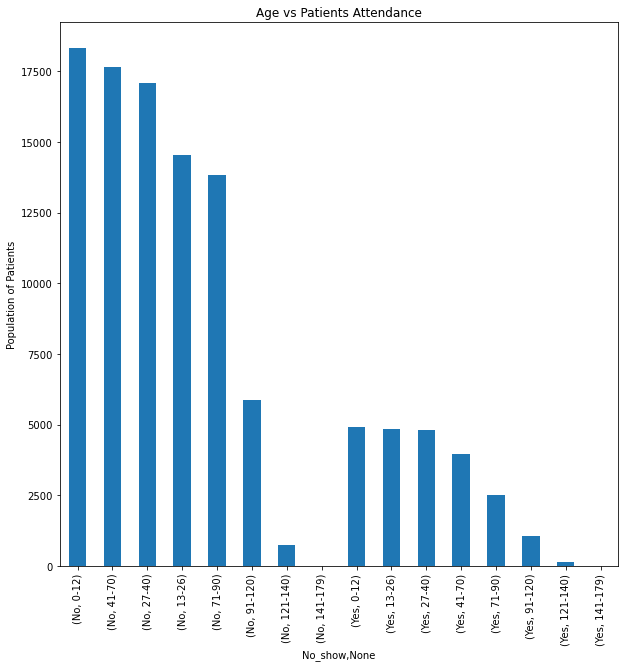

In [40]:
plt.xlabel('Age')
plt.ylabel('Population of Patients')
plt.title("Age vs Patients Attendance")
ag=df.groupby('No_show').Age.value_counts()
ag.plot(kind='bar', figsize=(10,10))

### Answer 4
> Most of those who registered for appointment are youngsters and the difference in the show-up rate is not too significant. 

### Research Question 5: Does patient's medical problem affects their attendance

Hipertension  No_show
0             No         70081
              Yes        18525
1             No         17968
              Yes         3748
Name: No_show, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


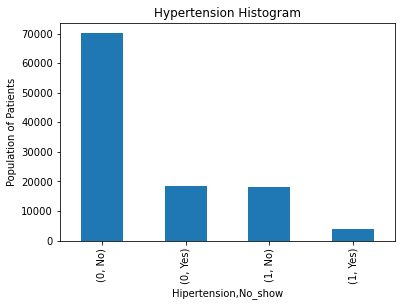

In [41]:
# disease = df[['Hipertension','Diabetes','Alcoholism','Handicap']]
# disease.value_counts()

#defining a function for the histogram plotting of various disease types in the datasets
def plothist(dataframe, title, grpby, y='Population of Patients'):
    plt.ylabel(y)
    plt.title(title)
    dff = dataframe.groupby(grpby).No_show.value_counts()
    print(dff)
    return dff.plot(kind='bar')

#calling the function
print (plothist(dataframe=df,title='Hypertension Histogram', grpby='Hipertension'))

Diabetes  No_show
0         No         81571
          Yes        20851
1         No          6478
          Yes         1422
Name: No_show, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


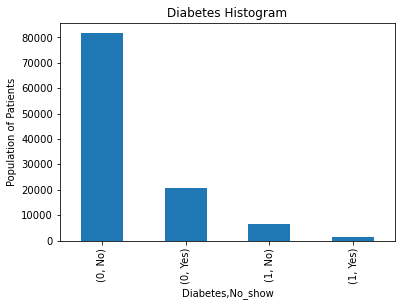

In [42]:
print (plothist(dataframe=df,title='Diabetes Histogram', grpby='Diabetes'))

Alcoholism  No_show
0           No         85372
            Yes        21598
1           No          2677
            Yes          675
Name: No_show, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


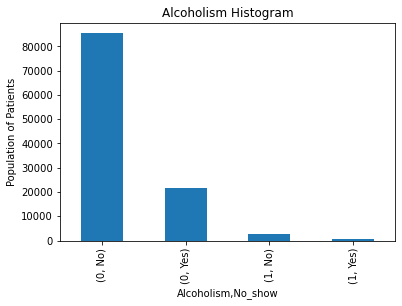

In [43]:
print (plothist(df, y='Population of Patients',title='Alcoholism Histogram', grpby='Alcoholism'))

Handicap  No_show
0         No         86373
          Yes        21909
1         No          1676
          Yes          364
Name: No_show, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


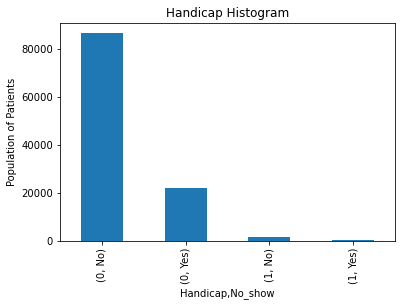

In [44]:
print (plothist(df, y='Population of Patients',title='Handicap Histogram', grpby='Handicap'))

### Answer 5
> From the charts above we can see that majority of the patients do not have the particular disease and yet, they show up for the appointment. We also see that patient with Alcoholism and Handicap will also show up either they are affected with it or not.

<a id='conclusions'></a>
## Conclusions

> <b>Results:</b> 
>1. We can see that out of these factors, the waiting periods is the factor that affects patients attendance most. 2. The next is the age, although difference is insignificant, we can easily deduce that young people will show up more for their appointment. 
>3. Patient with alcholosim and handicap will definately show up because they have a low number of people that did not show up with respect to the total number of patients.
>4. Scholarship does not have a possitive influence on the show up of patient.


> <b>Recommendation:</b><br>
> More research should be done to find out if the patient would want to reschedule to allow them show for the appointment when they are chanced or convinient.

> <b>Limitation:</b><br>
>1. The results of this analysis cannot be used as a general measure because the data are only gathered from some hospital in Brazil. Thus, reasons may differ from country to country.

In [45]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

Traceback (most recent call last):
  File "/home/ict_admin/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/ict_admin/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/ict_admin/anaconda3/lib/python3.9/site-packages/nbconvert/__main__.py", line 2, in <module>
    main()
  File "/home/ict_admin/anaconda3/lib/python3.9/site-packages/jupyter_core/application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/home/ict_admin/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "/home/ict_admin/anaconda3/lib/python3.9/site-packages/nbconvert/nbconvertapp.py", line 346, in start
    self.convert_notebooks()
  File "/home/ict_admin/anaconda3/lib/python3.9/site-packages/nbconvert/nbconvertapp.py", line 506, in convert_notebooks
    rais

1